# Examen Parcial Segunda Oportunidad

## Tema: Evaluar el impacto de las ventas en un supermercado según la temperatura

La temperatura podría tener un impacto en las ventas de un supermercado, sobre todo en algunas secciones. Para que el modelo sea mas notorio utilice la sección de bebidas, y verifique si las ventas en ciertas de ellas tienen relación con la temperatura.

Se proporcionan dos conjuntos de datos (en formato compactado .zip):
- ventas.csv  
- meteorologia.csv

## Resultados a observar:

- Periodo de Enero a Setiembre del año 2021
- Observar la sección 'Bebidas'
- Observar su relación con la temperatura

## Preguntas a responder:
- ¿La temperatura tiene impacto en las ventas de bebidas? 
- ¿Cuales bebidas tienen mayor impacto? ¿Con alcohol o sin alcohol?
- ¿Cual es la marca de bebidas de mayor venta?

Demuestre la respuesta utilizando tablas y gráficos
Tiempo de desarrollo de la tarea: 120 minutos

In [2]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# cargar del conjunto de datos
ventasDatos = pd.read_csv('./ventas.csv', sep=',')
meteorologia = pd.read_excel('./temperaturaEdit.xlsx')


- Periodo de Enero a Setiembre del año 2021

In [4]:
# filtro por el año 2021 de enero a septiembre
ventasDatos['fecha_vta'] = pd.to_datetime(ventasDatos['fecha_vta'])
ventasDatos = ventasDatos[(ventasDatos['fecha_vta'] >= '2021-01-01') & (ventasDatos['fecha_vta'] <= '2021-09-30')]
ventasDatos

,fecha_vta,local,desc_producto,desc_secciones,desc_sub_secciones,desc_categoria,desc_marca,cantidad
0,2021-01-02,Local X,PASTA PORA ÑOQUIS DE HUEVO 400 GRS.,Perecederos,Pastas Frescas,Nacional,PASTA PORA,1.000
1,2021-01-02,Local X,PASTA PORA ÑOQUIS DE HUEVO 400 GRS.,Perecederos,Pastas Frescas,Nacional,PASTA PORA,1.000
2,2021-01-02,Local X,PASTA PORA ÑOQUIS DE HUEVO 400 GRS.,Perecederos,Pastas Frescas,Nacional,PASTA PORA,1.000
3,2021-01-02,Local X,SAN LOREN BEBIDA LACT. ULTRA 1 LITRO,Perecederos,Lacteos,Sachet,San Loren,4.000
4,2021-01-02,Local X,SAN LOREN BEBIDA LACT FORTIF LIGHT ULTRA 1LT*,Perecederos,Lacteos,Sachet,San Loren,4.000
...,...,...,...,...,...,...,...,...
9447657,2021-09-30,Local Y,TOMATE PERITA X KL(PICADO),Perecederos,Verdulería,Tomate,VARIOS...,0.645
9447658,2021-09-30,Local Y,"KINGO QUESO PY X KG.,,,",Perecederos,Fiambrería,Paraguay,TRES PRINCESAS,0.170
9447659,2021-09-30,Local Y,FELIPITO X KG.,Produccion,Panaderia,Frescos,LORENZITO,0.505
9447660,2021-09-30,Local Y,EL PAIS ARROZ AZUL TIPO II 1 KG *30.,Almacen,Arroz,Nacionales,EL PAIS,1.000


- Observar la sección 'Bebidas'

In [5]:
ventasDatosBebidas = ventasDatos[ventasDatos['desc_secciones'] == 'Bebidas']
ventasDatosBebidas

,fecha_vta,local,desc_producto,desc_secciones,desc_sub_secciones,desc_categoria,desc_marca,cantidad
69,2021-01-02,Local X,COCA COLA PACK + FANTA GURANA 3 LTS,Bebidas,Sin Alcohol,Descartable,COCA COLA,1.0
75,2021-01-02,Local X,CRUSH PACKx2 PIÑA + NARANJA 2 LTS,Bebidas,Sin Alcohol,Descartable,CRUSH,1.0
133,2021-01-02,Local X,H. JUANCHO HIELO 3 KL,Bebidas,Sin Alcohol,sin asignar.,HIELO JUANCHO,1.0
134,2021-01-02,Local X,"H. JUANCHO HIELO 1,3 KL",Bebidas,Sin Alcohol,sin asignar.,HIELO JUANCHO,1.0
139,2021-01-02,Local X,HIELO TERERE PANTANO * 700 GR,Bebidas,Sin Alcohol,sin asignar.,TERERE PANTANO,1.0
...,...,...,...,...,...,...,...,...
9447598,2021-09-30,Local Y,TANG JUGO ABACAXI 25GR,Bebidas,Sin Alcohol,Polvo,TANG,1.0
9447599,2021-09-30,Local Y,TANG JUGO ABACAXI 25GR,Bebidas,Sin Alcohol,Polvo,TANG,1.0
9447613,2021-09-30,Local Y,ADES PACK NARANJA 200ML PAG 5 LLEV 6,Bebidas,Sin Alcohol,Nectar,ADES,1.0
9447614,2021-09-30,Local Y,ADES FRUTA TROPICAL 200 ML *24,Bebidas,Sin Alcohol,Soja,ADES,1.0


- Observar su relación con la temperatura

In [6]:
meteorologia.groupby('Mes').mean()
meteorologia


,Código,Estación,Año,Mes,Día01,Día02,Día03,Día04,Día05,Día06,...,Día22,Día23,Día24,Día25,Día26,Día27,Día28,Día29,Día30,Día31
0,86068,"Mcal. Estigarribia, Dpto. de Boquerón",2019,1,30.1,32.6,31.6,29.2,29.5,32.5,...,33.9,34.2,36.6,35.5,33.6,33.9,30.6,30.9,28.8,33.2
1,86068,"Mcal. Estigarribia, Dpto. de Boquerón",2019,2,32.1,31.4,25.5,26.0,27.9,27.8,...,33.2,32,32.5,30.6,23.1,24.3,26.1,NaN,NaN,NaN
2,86068,"Mcal. Estigarribia, Dpto. de Boquerón",2019,3,28.4,30.4,31.7,31.5,31.2,28.4,...,22.3,24.4,27.1,24.8,21.8,20.6,24.1,26.3,28.7,29.6
3,86068,"Mcal. Estigarribia, Dpto. de Boquerón",2019,4,28.1,26.1,24.3,27.0,20.2,18.3,...,24.8,20.3,19.3,20.1,19.3,20.4,20.0,24.9,25.6,NaN
4,86068,"Mcal. Estigarribia, Dpto. de Boquerón",2019,5,20.8,23,26.3,27.9,29.3,25.2,...,13.7,12.2,14.4,12.9,20.5,21.5,20.1,17.8,21.8,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,86297,"Encarnación, Dpto. de Itapua",2021,5,20.5,23.2,25.0,24.4,17.0,12.8,...,15.2,12.4,11.6,14,14.9,18.5,24.1,18.5,12.2,14.1
656,86297,"Encarnación, Dpto. de Itapua",2021,6,18.4,20.3,20.1,23.9,24.5,17.7,...,15,19.7,18.1,15.4,18.8,9.6,6.9,6.5,7.2,NaN
657,86297,"Encarnación, Dpto. de Itapua",2021,7,11.9,13.5,13.8,14.0,18.3,19.8,...,19.5,20.4,22.1,22.6,22.1,10.6,7.2,6.6,8.7,12.1
658,86297,"Encarnación, Dpto. de Itapua",2021,8,15.0,14,12.6,15.5,16.7,20.1,...,27.9,26.4,19.8,15.1,13.9,15.9,17.8,21.1,22.4,22.4


In [7]:
# Promedio por fila de todo 1 mes para cada estación 
temperatura = meteorologia[['Día01', 'Día02', 'Día03', 'Día04', 'Día05', 'Día06', 'Día07', 'Día08', 'Día09', 'Día10', 'Día11', 'Día12', 'Día13', 'Día14', 'Día15', 'Día16', 'Día17', 'Día18', 'Día19', 'Día20', 'Día21', 'Día22', 'Día23', 'Día24', 'Día25', 'Día26', 'Día27', 'Día28', 'Día29', 'Día30', 'Día31']]
temperatura['Promedio'] = meteorologia[['Día01', 'Día02', 'Día03', 'Día04', 'Día05', 'Día06', 'Día07', 'Día08', 'Día09', 'Día10', 'Día11', 'Día12', 'Día13', 'Día14', 'Día15', 'Día16', 'Día17', 'Día18', 'Día19', 'Día20', 'Día21', 'Día22', 'Día23', 'Día24', 'Día25', 'Día26', 'Día27', 'Día28', 'Día29', 'Día30', 'Día31']].mean(axis=1)
temperatura

C:\Users\david\AppData\Local\Temp\ipykernel_10448\4150061083.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temperatura['Promedio'] = meteorologia[['Día01', 'Día02', 'Día03', 'Día04', 'Día05', 'Día06', 'Día07', 'Día08', 'Día09', 'Día10', 'Día11', 'Día12', 'Día13', 'Día14', 'Día15', 'Día16', 'Día17', 'Día18', 'Día19', 'Día20', 'Día21', 'Día22', 'Día23', 'Día24', 'Día25', 'Día26', 'Día27', 'Día28', 'Día29', 'Día30', 'Día31']].mean(axis=1)
C:\Users\david\AppData\Local\Temp\ipykernel_10448\4150061083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperatura['Promedio'] = m

,Día01,Día02,Día03,Día04,Día05,Día06,Día07,Día08,Día09,Día10,...,Día23,Día24,Día25,Día26,Día27,Día28,Día29,Día30,Día31,Promedio
0,30.1,32.6,31.6,29.2,29.5,32.5,30.9,29.3,32.0,31.5,...,34.2,36.6,35.5,33.6,33.9,30.6,30.9,28.8,33.2,29.088889
1,32.1,31.4,25.5,26.0,27.9,27.8,30.8,34.3,34.2,33.0,...,32,32.5,30.6,23.1,24.3,26.1,NaN,NaN,NaN,29.017647
2,28.4,30.4,31.7,31.5,31.2,28.4,33.3,32.0,21.9,21.1,...,24.4,27.1,24.8,21.8,20.6,24.1,26.3,28.7,29.6,26.461111
3,28.1,26.1,24.3,27.0,20.2,18.3,19.6,20.8,22.9,23.2,...,20.3,19.3,20.1,19.3,20.4,20.0,24.9,25.6,NaN,24.270588
4,20.8,23,26.3,27.9,29.3,25.2,22.9,26.3,27.2,25.3,...,12.2,14.4,12.9,20.5,21.5,20.1,17.8,21.8,19.6,22.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,20.5,23.2,25.0,24.4,17.0,12.8,11.6,15.0,18.5,20.6,...,12.4,11.6,14,14.9,18.5,24.1,18.5,12.2,14.1,17.938889
656,18.4,20.3,20.1,23.9,24.5,17.7,17.5,17.6,17.6,19.0,...,19.7,18.1,15.4,18.8,9.6,6.9,6.5,7.2,NaN,15.864706
657,11.9,13.5,13.8,14.0,18.3,19.8,17.8,19.0,18.7,18.3,...,20.4,22.1,22.6,22.1,10.6,7.2,6.6,8.7,12.1,14.566667
658,15.0,14,12.6,15.5,16.7,20.1,22.3,22.6,18.4,12.7,...,26.4,19.8,15.1,13.9,15.9,17.8,21.1,22.4,22.4,18.277778


## Preguntas a responder:
- ¿La temperatura tiene impacto en las ventas de bebidas? 
- ¿Cuales bebidas tienen mayor impacto? ¿Con alcohol o sin alcohol?
- ¿Cual es la marca de bebidas de mayor venta?

Como se ve en las graficas y en los dataframe:
1. Se puede notar que la temperatura tiene gran impacto sobre el consumo de bebidas
2. La bebida sin Alcohol tiene mayor impacto
3. La marca con mayor venta  es Skol

<AxesSubplot:title={'center':'Bebidas alcoholica y no alcoholica '}>

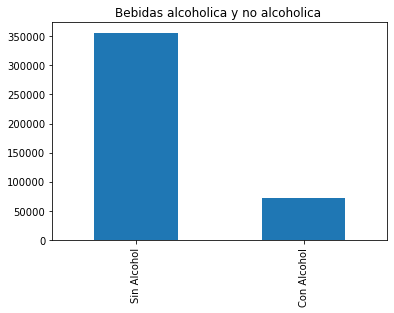

In [8]:
aux = ventasDatos[(ventasDatos["desc_secciones"] == 'Bebidas')]
aux["desc_sub_secciones"].value_counts().plot.bar(title="Bebidas alcoholica y no alcoholica ")

<AxesSubplot:title={'center':'Bebidas de mayor venta'}, xlabel='desc_marca'>

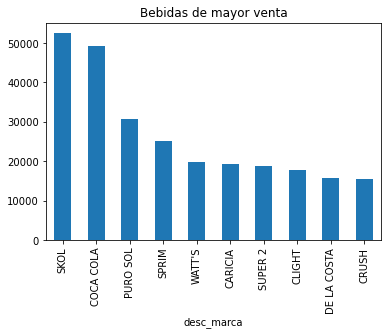

In [9]:
marca_bebidas = ventasDatos[(ventasDatos["desc_secciones"] == 'Bebidas')]
mayor=marca_bebidas.groupby('desc_marca')['cantidad'].sum().sort_values(ascending=False)
mayor[:10].plot.bar(title="Bebidas de mayor venta")